In [84]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import fits
import math

In [85]:
filename = "/Users/victroisecelarier/Documents/Cours/2A/Stage_ENS/DATA_SIMS/Output00034_size0128_hyperCube.fits"
file = fits.open(filename)

In [86]:
file.info()

Filename: /Users/victroisecelarier/Documents/Cours/2A/Stage_ENS/DATA_SIMS/Output00034_size0128_hyperCube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  dens          1 PrimaryHDU      24   (128, 128, 128)   float64   
  1  vx            1 ImageHDU        25   (128, 128, 128)   float64   
  2  vy            1 ImageHDU        25   (128, 128, 128)   float64   
  3  vz            1 ImageHDU        25   (128, 128, 128)   float64   
  4  Bx            1 ImageHDU        25   (128, 128, 128)   float64   
  5  By            1 ImageHDU        25   (128, 128, 128)   float64   
  6  Bz            1 ImageHDU        25   (128, 128, 128)   float64   


In [87]:
filename2 = "/Users/victroisecelarier/Documents/Cours/2A/Stage_ENS/DATA_SIMS/Output00034_size0128_cube_temp.fits"
file2 = fits.open(filename2)

In [88]:
file2.info()

Filename: /Users/victroisecelarier/Documents/Cours/2A/Stage_ENS/DATA_SIMS/Output00034_size0128_cube_temp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  temp          1 PrimaryHDU      23   (128, 128, 128)   float64   


In [206]:
def Tb_z(x, y, u):     #la LOS est selon z, on regarde donc vz ??? 
    C = 1.823e18
    dz = 1
    v = file[3].data
    n = file[0].data
    T = file2[0].data
    k_b = 1.38e-23
    m = 1.67e-27
    S = 0
    for z in range(128):
        sigma = np.sqrt(k_b*T[x,y,z]/m)
        S += n[x,y,z]/sigma * np.exp(- (u - v[x,y,z])**2/(2*sigma**2)) * dz
    return S/(C*np.sqrt(2*np.pi))

In [210]:
def Print_Tb_z(x, y, u_max, u_min, du):
    n = int((u_max - u_min)/du) + 1
    U = np.linspace(u_min, u_max, n)
    Tb = []
    for u in U :
        Tb.append(Tb_z(x, y, u))
    return(Tb)

In [225]:
x = 0
y = 0
u_max = 12.1
u_min = -12.3
du = 0.1

n = int((u_max - u_min)/du) + 1
U = np.linspace(u_min, u_max, n)
Temp = Print_Tb_z(x, y, u_max, u_min, du)

print(Temp)

#plt.plot(U, Temp)
#plt.show()

(array([-12.3       , -12.19958848, -12.09917695, -11.99876543,
       -11.89835391, -11.79794239, -11.69753086, -11.59711934,
       -11.49670782, -11.3962963 , -11.29588477, -11.19547325,
       -11.09506173, -10.99465021, -10.89423868, -10.79382716,
       -10.69341564, -10.59300412, -10.49259259, -10.39218107,
       -10.29176955, -10.19135802, -10.0909465 ,  -9.99053498,
        -9.89012346,  -9.78971193,  -9.68930041,  -9.58888889,
        -9.48847737,  -9.38806584,  -9.28765432,  -9.1872428 ,
        -9.08683128,  -8.98641975,  -8.88600823,  -8.78559671,
        -8.68518519,  -8.58477366,  -8.48436214,  -8.38395062,
        -8.28353909,  -8.18312757,  -8.08271605,  -7.98230453,
        -7.881893  ,  -7.78148148,  -7.68106996,  -7.58065844,
        -7.48024691,  -7.37983539,  -7.27942387,  -7.17901235,
        -7.07860082,  -6.9781893 ,  -6.87777778,  -6.77736626,
        -6.67695473,  -6.57654321,  -6.47613169,  -6.37572016,
        -6.27530864,  -6.17489712,  -6.0744856 ,  -5.9

In [158]:
def liste_vz(file, k):
    Lmax = []
    Lmin = []
    for i in range(0,127):
        for j in range(0,127):
            Lmax.append(max(file[k].data[i,j]))
            Lmin.append(min(file[k].data[i,j]))
    return (max(Lmax), min(Lmin))

In [159]:
liste_vz(file, 3)

(12.074305402859748, -12.230882490142049)

In [11]:
def velocity_centroid(x,y):
    Nom = 0
    Den = 0
    dz = 1
    vz = file[3].data
    n = file[0].data
    for z in (0,127):
        Nom += n[x,y,z]*vz[x,y,z]*dz
        Den += n[x,y,z]*dz
    return Nom/Den

def velocity_dispersion(x,y):
    Nom = 0
    Den = 0
    dz = 1
    vz = file[3].data
    n = file[0].data
    C = velocity_centroid(x,y)**2
    for z in (0,127):
        Nom += n[x,y,z]*(vz[x,y,z]**2)*dz
        Den += n[x,y,z]*dz
    return Nom/Den - C**2


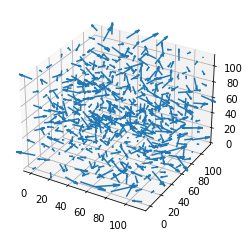

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x, y, z = np.meshgrid(np.arange(0, 128, 16),
                      np.arange(0, 128, 16),
                      np.arange(0, 128, 16)
                     )

vx = file[1].data[x,y,z]
vy = file[2].data[x,y,z]
vz = file[3].data[x,y,z]

norm  = vx**2 + vy**2 + vz**2

ax.quiver(x, y, z, vx, vy, vz, length=2,)
#ax.view_init(elev=90, azim=-90)           #to see along the line of sight

plt.show()

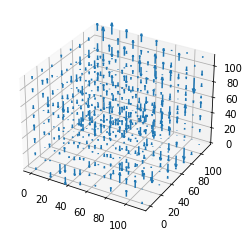

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x, y, z = np.meshgrid(np.arange(0, 128, 16),
                      np.arange(0, 128, 16),
                      np.arange(0, 128, 16)
                     )

vx = 0
vy = 0
vz = file[3].data[x,y,z]

norm  = vz**2

ax.quiver(x, y, z, vx, vy, vz, length=2,)
#ax.view_init(elev=90, azim=-90)           #to see along the line of sight

plt.show()


/var/folders/0d/4y9hvk_91771kg42jrf2s8nw0000gn/T/ipykernel_15918/1085175410.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, z)


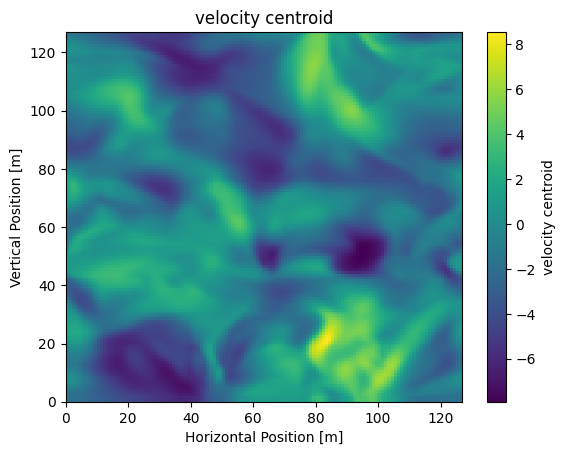

In [28]:
plt.style.use(['default'])

x, y = np.meshgrid(np.arange(0, 128, 1),
                   np.arange(0, 128, 1))

z = velocity_centroid(x,y)

#plt.contourf(x,y,z, levels=100, cmap='plasma')
plt.pcolormesh(x, y, z)
plt.colorbar(label='velocity centroid')
plt.xlabel('Horizontal Position [m]')
plt.ylabel('Vertical Position [m]')
plt.title('velocity centroid')
plt.show()

/var/folders/0d/4y9hvk_91771kg42jrf2s8nw0000gn/T/ipykernel_15918/2348443722.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, z)


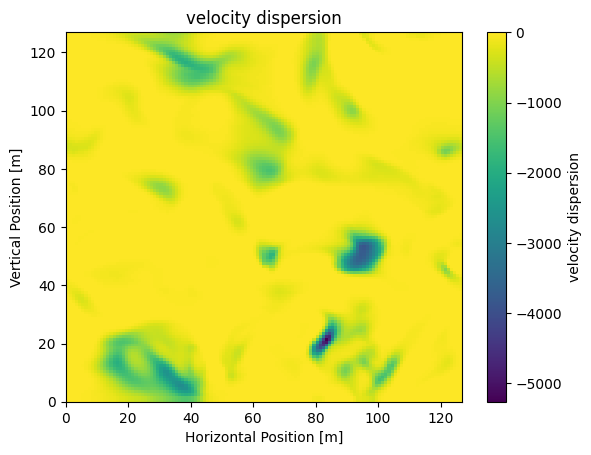

In [26]:
plt.style.use(['default'])

x, y = np.meshgrid(np.arange(0, 128, 1),
                   np.arange(0, 128, 1))

z = velocity_dispersion(x,y)

#plt.contourf(x,y,z, levels=100, cmap='plasma')
plt.pcolormesh(x, y, z)
plt.colorbar(label='velocity dispersion')
plt.xlabel('Horizontal Position [m]')
plt.ylabel('Vertical Position [m]')
plt.title('velocity dispersion')
plt.show()

In [76]:
def sigma_vz(file):
    vz = file[3].data
    return np.std(vz,0)

/var/folders/0d/4y9hvk_91771kg42jrf2s8nw0000gn/T/ipykernel_15918/720267566.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, z)


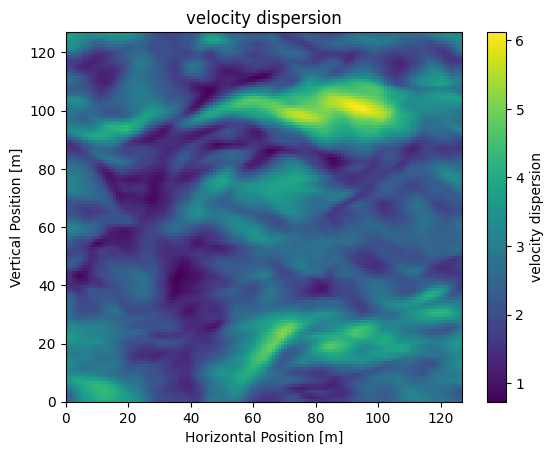

In [77]:
x, y = np.meshgrid(np.arange(0, 128, 1),
                   np.arange(0, 128, 1))

z = sigma_vz(file)[x, y]

#plt.contourf(x,y,z, levels=100, cmap='plasma')
plt.pcolormesh(x, y, z)
plt.colorbar(label='velocity dispersion')
plt.xlabel('Horizontal Position [m]')
plt.ylabel('Vertical Position [m]')
plt.title('velocity dispersion')
plt.show()

In [78]:
def Stokes_xy(file,x,y):
    n = 128
    dz = 1
    p_0 = 1
    S = [0,0]
    for z in range(n):
        rho, b_x, b_y, b_z = file[0].data[x,y,z], file[4].data[x,y,z], file[5].data[x,y,z], file[6].data[x,y,z]
        b_norm = np.sqrt(b_x**2 + b_y**2 + b_z**2)
        S[0] += rho * p_0 *(b_x**2 - b_y**2)/b_norm**2 * dz
        S[1] += 2 * rho * p_0 * b_x * b_y /b_norm**2 * dz
    return S

def psi(Q,U):
    return np.arctan(U/Q)

def psi_tab(file):
    n = 128
    tab = np.zeros((n,n))
    for x in range(n):
        for y in range(n):
            S = Stokes_xy(file, x, y)
            Q, U = S[0], S[1]
            tab[x,y] = psi(Q,U)
    return tab


def sigma_psi_global(file):
    return np.std(psi_tab(file))*180/np.pi

def sigma_psi_line(file):
    """returns an array of sigma_psi of each line"""
    return np.std(psi_tab(file), 0)*180/np.pi

In [81]:
def B_orthogonal(x,y):
    n = file[0].data[x,y,:]
    Sigma_vz = sigma_vz(file)[x, y]
    Sigma_tim = sigma_psi_line(file)[x, y]
    return spqrt(4*math.pi*n[z]/3)*Sigma_vz[z]/Sigma_tim[z]

In [82]:
x, y = np.meshgrid(np.arange(0, 128, 1),
                   np.arange(0, 128, 1))

z = B_orthogonal(x,y)

#plt.contourf(x,y,z, levels=100, cmap='plasma')
plt.pcolormesh(x, y, z)
plt.colorbar(label='velocity dispersion')
plt.xlabel('Horizontal Position [m]')
plt.ylabel('Vertical Position [m]')
plt.title('velocity dispersion')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed